# Prosper Loan Data Exploration
## by BOUDISSA Mohamed Nourelhak

## Preliminary Wrangling

>We will be exploring Prosper Loan Data, Prosper is a peer-to-peer lending service where you micro-invest amounts as small as 25 USD in other user's loans.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

### Gather

In [2]:
df = pd.read_csv('prosperLoanData.csv')

### Assess

In [3]:
print(df.shape)
pd.set_option('display.max_columns',81)
df.head()

(113937, 81)


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [6]:
# data types
for column in df.columns:
    print(column, type(df[column][0]))

ListingKey <class 'str'>
ListingNumber <class 'numpy.int64'>
ListingCreationDate <class 'str'>
CreditGrade <class 'str'>
Term <class 'numpy.int64'>
LoanStatus <class 'str'>
ClosedDate <class 'str'>
BorrowerAPR <class 'numpy.float64'>
BorrowerRate <class 'numpy.float64'>
LenderYield <class 'numpy.float64'>
EstimatedEffectiveYield <class 'numpy.float64'>
EstimatedLoss <class 'numpy.float64'>
EstimatedReturn <class 'numpy.float64'>
ProsperRating (numeric) <class 'numpy.float64'>
ProsperRating (Alpha) <class 'float'>
ProsperScore <class 'numpy.float64'>
ListingCategory (numeric) <class 'numpy.int64'>
BorrowerState <class 'str'>
Occupation <class 'str'>
EmploymentStatus <class 'str'>
EmploymentStatusDuration <class 'numpy.float64'>
IsBorrowerHomeowner <class 'numpy.bool_'>
CurrentlyInGroup <class 'numpy.bool_'>
GroupKey <class 'float'>
DateCreditPulled <class 'str'>
CreditScoreRangeLower <class 'numpy.float64'>
CreditScoreRangeUpper <class 'numpy.float64'>
FirstRecordedCreditLine <class 'st

In [7]:
df.Occupation.isnull().sum()

3588

In [8]:
df.EmploymentStatus.isnull().sum()

2255

In [9]:
df.IsBorrowerHomeowner.isnull().sum()

0

In [10]:
df.BorrowerState.isnull().sum()

5515

In [11]:
df.LoanStatus.isnull().sum()

0

In [12]:
numeric = df.describe().columns
not_numeric = [i for i in df.columns if i not in  numeric]
print(numeric)
print('\n**************************************************************\n')
print(not_numeric)

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',

In [13]:
df[['ProsperRating (Alpha)', 'CreditGrade', 'ListingCreationDate']]

ProsperRating (Alpha) CreditGrade            ListingCreationDate
0                        NaN           C  2007-08-26 19:09:29.263000000
1                          A         NaN  2014-02-27 08:28:07.900000000
2                        NaN          HR  2007-01-05 15:00:47.090000000
3                          A         NaN  2012-10-22 11:02:35.010000000
4                          D         NaN  2013-09-14 18:38:39.097000000
5                          B         NaN  2013-12-14 08:26:37.093000000
6                          E         NaN  2013-04-12 09:52:56.147000000
7                          C         NaN  2013-05-05 06:49:27.493000000
8                         AA         NaN  2013-12-02 10:43:39.117000000
9                         AA         NaN  2013-12-02 10:43:39.117000000
10                         C         NaN  2012-05-10 07:04:01.577000000
11                       NaN           C  2007-10-09 20:28:33.640000000
12                         B         NaN  2013-12-15 20:01:10.757000000
13                         A         NaN  2013-07-15 16:28:28.087000000
14                         A         NaN  2013-04-19 11:17:41.700000000
15                        HR         NaN  2012-04-10 09:14:46.297000000
16                         E         NaN  2013-07-16 12:42:48.680000000
17                       NaN          AA  2006-08-15 12:21:09.433000000
18                         A         NaN  2013-02-20 03:48:37.470000000
19                         D         NaN  2013-08-21 06:49:02.093000000
20                         B         NaN  2013-11-22 11:35:02.987000000
21                       NaN           D  2007-11-30 20:33:49.227000000
22                        HR         NaN  2013-01-30 09:36:13.783000000
23                         D         NaN  2013-04-22 13:29:19.073000000
24                         C         NaN  2013-12-03 11:34:46.127000000
25                         E         NaN  2013-10-02 14:31:09.157000000
26                         E         NaN  2013-02-12 18:07:31.690000000
27                         A         NaN  2010-06-16 16:23:44.533000000
28                         C         NaN  2013-11-02 16:01:28.050000000
29                         A         NaN  2013-12-17 09:18:33.220000000
...                      ...         ...                            ...
113907                    HR         NaN  2013-11-09 06:55:05.690000000
113908                     E         NaN  2010-11-29 10:40:09.730000000
113909                     C         NaN  2012-09-08 10:34:38.837000000
113910                     E         NaN  2014-01-24 19:56:49.960000000
113911                     D         NaN  2013-11-15 11:42:47.540000000
113912                    AA         NaN  2013-12-16 16:36:00.990000000
113913                     A         NaN  2010-04-25 15:13:27.963000000
113914                   NaN          HR  2006-08-09 14:34:40.010000000
113915                   NaN           D  2008-07-29 05:22:29.390000000
113916                     E         NaN  2012-11-08 20:07:36.600000000
113917                     E         NaN  2013-11-23 04:52:50.057000000
113918                   NaN           A  2008-06-19 12:02:53.300000000
113919                     D         NaN  2013-05-07 18:49:59.750000000
113920                    HR         NaN  2013-06-11 05:49:40.247000000
113921                   NaN          AA  2005-11-09 20:44:28.847000000
113922                   NaN           C  2008-08-08 16:58:54.760000000
113923                   NaN           B  2008-09-10 08:26:30.537000000
113924                     A         NaN  2012-10-20 19:15:52.670000000
113925                     E         NaN  2013-04-25 13:54:45.017000000
113926                   NaN           E  2006-08-01 10:31:31.143000000
113927                   NaN          AA  2008-04-30 21:25:19.670000000
113928                     C         NaN  2011-06-06 19:02:44.443000000
113929                     E         NaN  2013-07-06 17:40:01.657000000
113930                     B         NaN  2013-

<a id = 'prosper_rating_alpha'></a>
**Note:**
CreditGrade is the Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
ProsperRating (Alpha) is the Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
so we can fill null values for one column by the values of the other column and that's what we are going to do in the cleaning section.

#### Quality
- some columns names are inaccurate
- some of our variables of interest contain missing values
- some of our variables of interest data type is string it should be category and others should be date

In [14]:
df_clean = df.copy()

### Clean
##### Define
>Fix columns names: remove the spaces and the brackets
##### Code

In [15]:
for column in df_clean:
    df_clean.rename(index=str, columns={column: column.replace(' ', '').replace('(', '_').replace(')', '')}, inplace=True)

##### Test

In [16]:
df_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating_numeric', 'ProsperRating_Alpha',
       'ProsperScore', 'ListingCategory_numeric', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBan

##### Define
>Fix missing values for our variables of interest: for Occupation and EmploymentStatus I will replace the null values with 'Other' and for BorrowerState column I'm going to drop rows with null values, and for ProsperRating_Alpha I'm going to fill the null values with values from CreditGrade.
##### Code

In [17]:
df_clean.Occupation.fillna('Other', inplace = True)
df_clean.EmploymentStatus.fillna('Other', inplace = True)
df_clean.dropna(subset = ['BorrowerState'], inplace = True)
df_clean.ProsperRating_Alpha.fillna(df_clean.CreditGrade, inplace = True)

##### Test

In [18]:
print(df_clean.Occupation.isnull().sum())
print(df_clean.EmploymentStatus.isnull().sum())
print(df_clean.BorrowerState.isnull().sum())
print(df_clean.ProsperRating_Alpha.isnull().sum())

0
0
0
131


>it still there some null values i'm just going to drop them

##### Code

In [19]:
df_clean.dropna(subset = ['ProsperRating_Alpha'], inplace = True)

##### Test

In [20]:
print(df_clean.ProsperRating_Alpha.isnull().sum())

0


##### Define
>Change data type from string to category.
##### Code

In [21]:
df_clean.ProsperRating_Alpha = pd.Categorical(df_clean.ProsperRating_Alpha, categories=["AA", "A", "B", "C", "D", "E", "HR"], ordered=True)
categories = ['EmploymentStatus', 'LoanStatus', 'IncomeRange', 'Occupation']
df_clean[categories] = df_clean[categories].astype('category')
# reorder categories for IncomeRange
df_clean.IncomeRange = df_clean.IncomeRange.cat.reorder_categories(['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
       '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed'])

##### Test

In [22]:
df_clean[categories].info()

<class 'pandas.core.frame.DataFrame'>
Index: 108291 entries, 0 to 113936
Data columns (total 4 columns):
EmploymentStatus    108291 non-null category
LoanStatus          108291 non-null category
IncomeRange         108291 non-null category
Occupation          108291 non-null category
dtypes: category(4)
memory usage: 1.2+ MB


##### Define
>Change data type from string to datetime using pandas.to_datetime()
##### Code

In [23]:
dates = ['ListingCreationDate','ClosedDate', 'LoanOriginationDate', 'FirstRecordedCreditLine', 'DateCreditPulled']
df_clean[dates] = df_clean[dates].apply(pd.to_datetime)

##### Test

In [24]:
df_clean[dates].info()

<class 'pandas.core.frame.DataFrame'>
Index: 108291 entries, 0 to 113936
Data columns (total 5 columns):
ListingCreationDate        108291 non-null datetime64[ns]
ClosedDate                 49443 non-null datetime64[ns]
LoanOriginationDate        108291 non-null datetime64[ns]
FirstRecordedCreditLine    108219 non-null datetime64[ns]
DateCreditPulled           108291 non-null datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 5.0+ MB


>Another problem a forget about it.
There is no ProsperRating_numeric for loans originated after July 2009, we must fill those values.

In [25]:
df_clean[['ProsperRating_Alpha', 'ProsperRating_numeric']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 108291 entries, 0 to 113936
Data columns (total 2 columns):
ProsperRating_Alpha      108204 non-null category
ProsperRating_numeric    84853 non-null float64
dtypes: category(1), float64(1)
memory usage: 1.8+ MB


##### Define
> fill null values for the loans originated after July 2009
##### Code

In [26]:
switcher = {
    'AA': 7,
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'HR': 1
}
for i in df_clean[df_clean.ProsperRating_numeric.isnull()].index:
    alph = df_clean.loc[i].ProsperRating_Alpha
    num = switcher.get(alph, np.nan)
    df_clean.at[i,'ProsperRating_numeric'] = num

##### Test

In [27]:
df_clean[['ProsperRating_Alpha', 'ProsperRating_numeric']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 108291 entries, 0 to 113936
Data columns (total 2 columns):
ProsperRating_Alpha      108204 non-null category
ProsperRating_numeric    108204 non-null float64
dtypes: category(1), float64(1)
memory usage: 6.8+ MB


In [28]:
df_clean[['ProsperRating_Alpha', 'ProsperRating_numeric']].sample(10)

ProsperRating_Alpha  ProsperRating_numeric
104880                   A                    6.0
67273                    D                    3.0
100604                   A                    6.0
14129                    A                    6.0
22913                   AA                    7.0
21056                   AA                    7.0
8183                    AA                    7.0
106230                   C                    4.0
26141                    B                    5.0
79250                    A                    6.0

#### Define
> Drop unused columns
#### Code

In [30]:
# columns to be used
used_cols = ['Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'BorrowerState', 'IncomeRange', 'LoanStatus', 'ProsperRating_Alpha', 
            'ListingCreationDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating_numeric', 'ProsperScore']
unused_cols  = [col for col in df_clean.columns if col not in used_cols]
df_clean.drop(labels = unused_cols, axis=1, inplace = True)

#### Test

In [31]:
df_clean.columns

Index(['ListingCreationDate', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating_numeric', 'ProsperRating_Alpha', 'ProsperScore',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'IncomeRange'],
      dtype='object')

### What is the structure of your dataset?

> There are 113937 loans in the dataset with 81 features like ('ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus'). most of the variables are numeric (61) and the others are categorical or date variables 

### What is/are the main feature(s) of interest in your dataset?
#### Who is using Prosper?:
> the main features of interest in our dataset to answer this question are all the features related with the user (Borrower)
- Occupation
- EmploymentStatus
- IsBorrowerHomeowner
- BorrowerState
#### Did Prosper users successfully accomplished their debts?
> The main feature of interest to answer this question is LoanStatus

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that i think they will help support my investigation into my features of interest are all the attributes associated with the borrowers (users) and the loans and all the various ratings.

## Univariate Exploration

In [32]:
base_color = sb.color_palette()[0]
def resize_plot(size):
    ''' resize the figure '''
    plt.figure(figsize = size)

#### Occupation

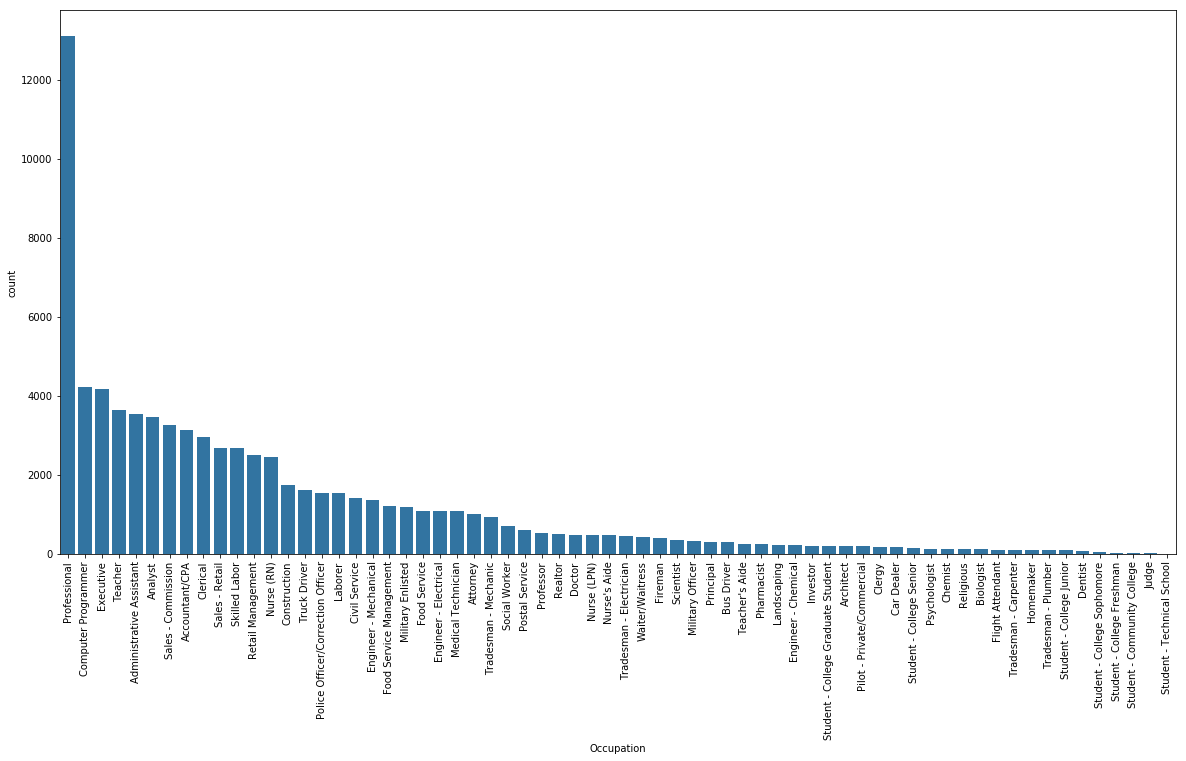

In [33]:
resize_plot([20,10])
# I have removed 'Other' to make the plot more clear
sb.countplot(data = df_clean, x = 'Occupation', color = base_color, order=df_clean['Occupation'].value_counts().iloc[1:].index)
plt.xticks(rotation = 90);

>According to the plot the most counted value for Occupation regardless to 'Other' is Professional with a large number (more than 13000) followed by Computer programmer and Executive with about 4000 and the least counted Occupations are the diffrent types of student.

#### EmploymentStatus

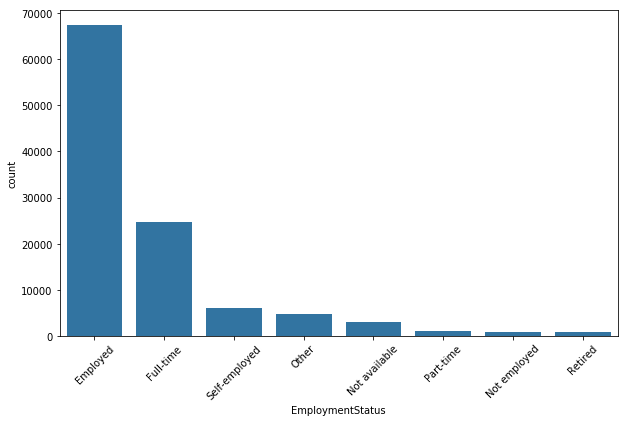

In [34]:
resize_plot([10,6])
sb.countplot(data = df_clean, x = 'EmploymentStatus', color = base_color, order = df_clean.EmploymentStatus.value_counts().index)
plt.xticks(rotation = 45);

>The weird thing i see about EmploymentStatus is that even part-time and full-time are also employed, let's join them together.

In [35]:
df_clean.EmploymentStatus.replace(['Full-time', 'Part-time'], 'Employed', inplace = True)
df_clean.EmploymentStatus.replace(['Not available'], 'Other', inplace = True)
df_clean.EmploymentStatus = df_clean.EmploymentStatus.cat.remove_unused_categories()

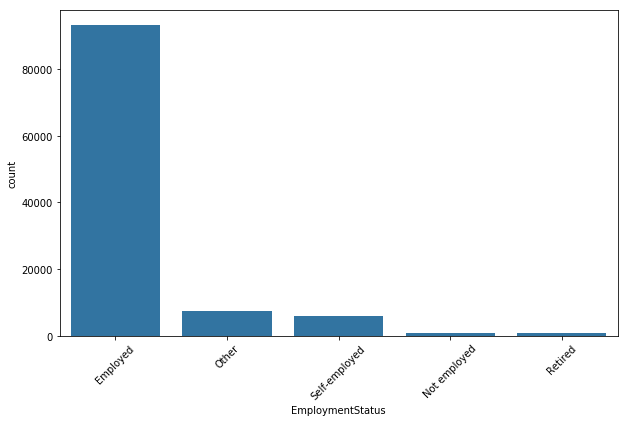

In [36]:
resize_plot([10,6])
sb.countplot(data = df_clean, x = 'EmploymentStatus', color = base_color, order = df_clean.EmploymentStatus.value_counts().index)
plt.xticks(rotation = 45);

>Now we can say that the majority of borrowers are employed and few of them are self-employed and a very small proportion of them are either retired or not employed.

#### IsBorrowerHomeowner

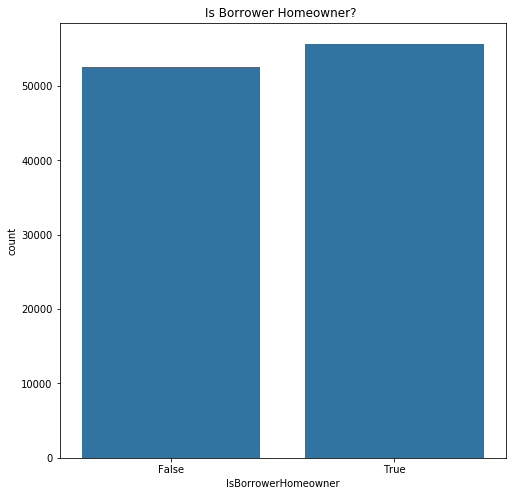

In [37]:
resize_plot([8,8])
sb.countplot(data = df_clean, x = 'IsBorrowerHomeowner', color = base_color)
plt.title('Is Borrower Homeowner? ');

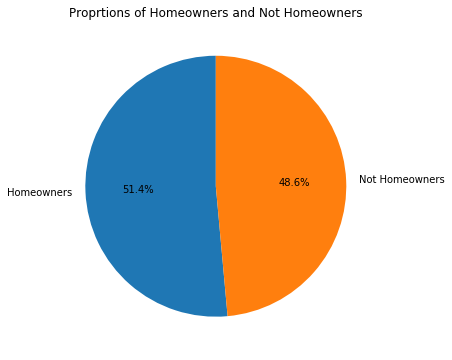

In [38]:
# proportions
x = round((df_clean.IsBorrowerHomeowner.value_counts()/df_clean.IsBorrowerHomeowner.count())*100, 2)
resize_plot([8,6])
plt.title('Proprtions of Homeowners and Not Homeowners')
labels = ['Homeowners', 'Not Homeowners']
plt.pie(x = x, labels = labels, startangle = 90, autopct='%1.1f%%');

>The number of borrowers that are homeowners is greater than the number of borrowers that are not homeowners.

#### BorrowerState

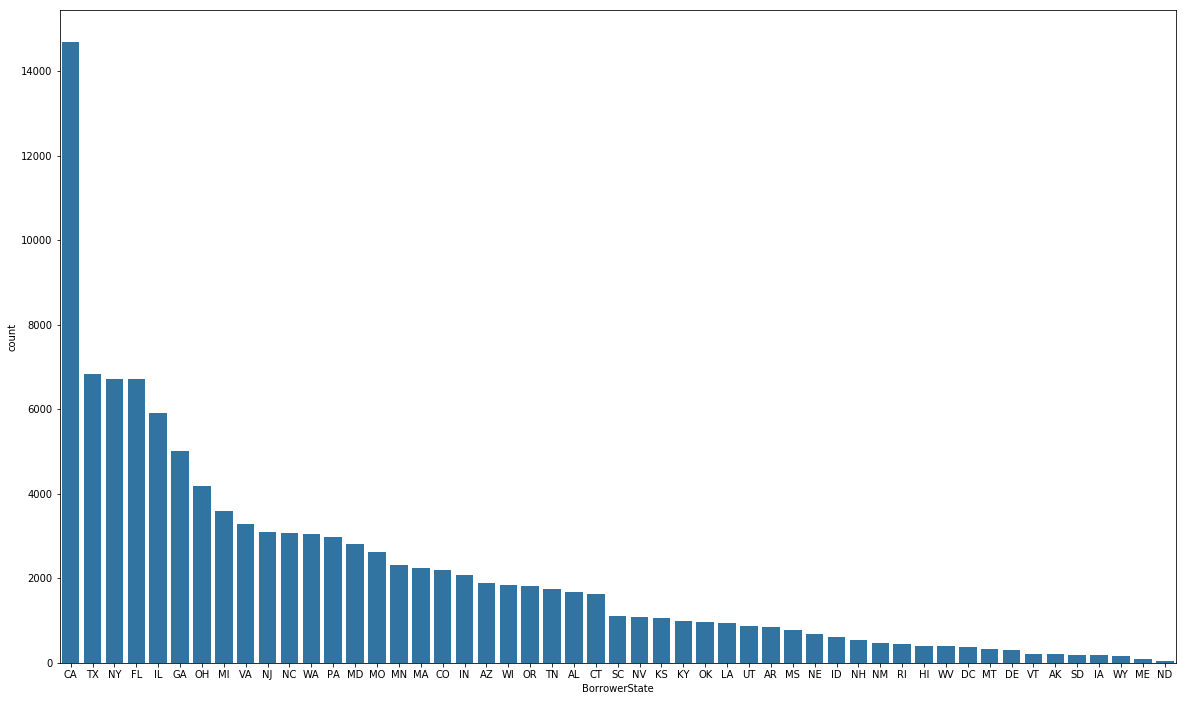

In [39]:
resize_plot([20, 12])
sb.countplot(data = df_clean, x = 'BorrowerState', color = base_color, order = df_clean.BorrowerState.value_counts().index);

>Most of Borrowers are from California maybe because Prosper is located in San Francisco, California.

#### IncomeRange

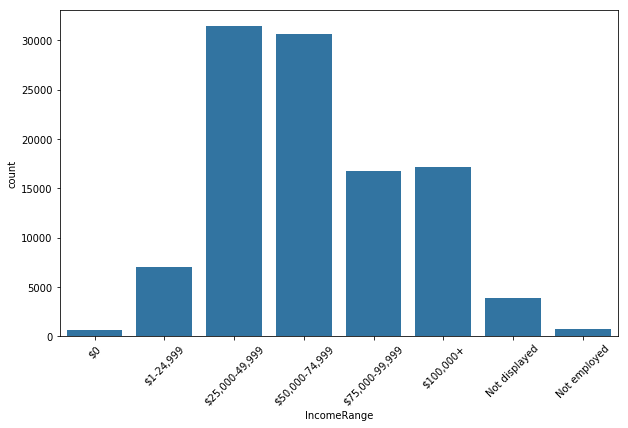

In [40]:
resize_plot([10,6])
sb.countplot(data = df_clean, x ='IncomeRange', color = base_color)
plt.xticks(rotation = 45);

>The majority of the users have income range between 25 and 49,99 or between 50 and 74,99, and a very small proportion with $0
or not-employed.


####  LoanStatus

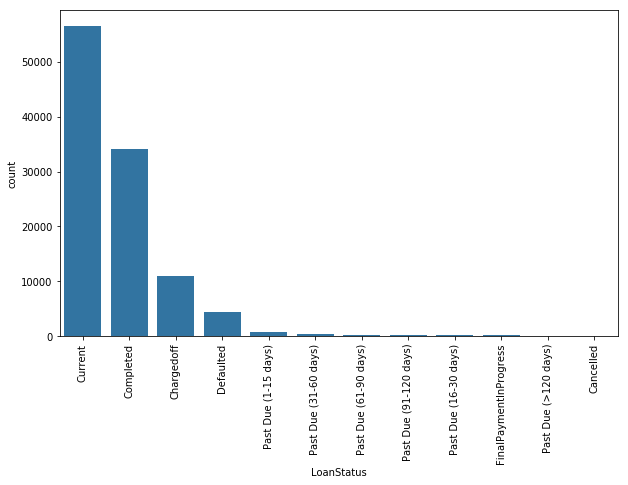

In [41]:
resize_plot([10,6])
sb.countplot(data = df_clean, x = 'LoanStatus', color = base_color, order = df_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation = 90);

>Actualy we are not interested with current loans or past due loans wich we don't know the output of it so, for this one let's just keep the finished loans (completed, chargedoff, and defaulted)

In [42]:
# keep only the finished loans (Chargedoff, Completed and Defaulted)
df_cleanf = df_clean.loc[df_clean.LoanStatus.isin(['Chargedoff','Completed', 'Defaulted'])]
#remove the unused categories from LoanStatus
df_cleanf.LoanStatus.cat.remove_unused_categories(inplace=True)

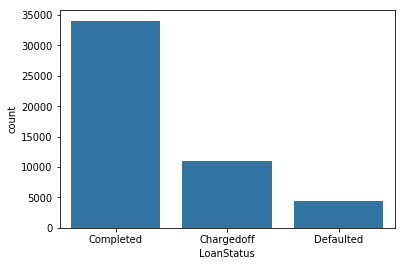

In [43]:
sb.countplot(data = df_cleanf, x = 'LoanStatus', color = base_color, order = df_cleanf['LoanStatus'].value_counts().index);

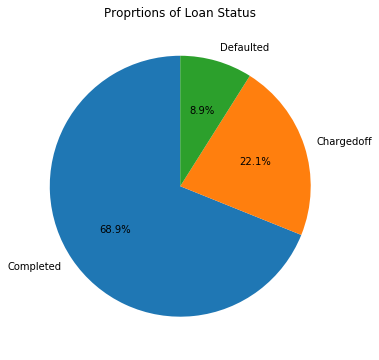

In [44]:
# proportions
x = round((df_cleanf.LoanStatus.value_counts()/df_cleanf.LoanStatus.count())*100, 2)
resize_plot([8,6])
plt.title('Proprtions of Loan Status')
plt.pie(x = x.values, labels = x.index, startangle = 90, autopct='%1.1f%%');

>more than 68% of loans are completed, 22% are chargedoff and only about 9% of loans are defaulted.

#### ProsperRating_Alpha

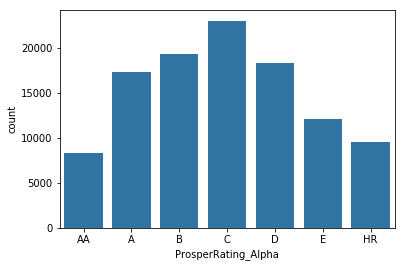

In [45]:
sb.countplot(data = df_clean, x = 'ProsperRating_Alpha', color = base_color);

>The rating counts form a normal distrubtion centred around "C" in the middle which divides loans with lower risk and loans with higher risk.

#### ListingCreationDate

C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


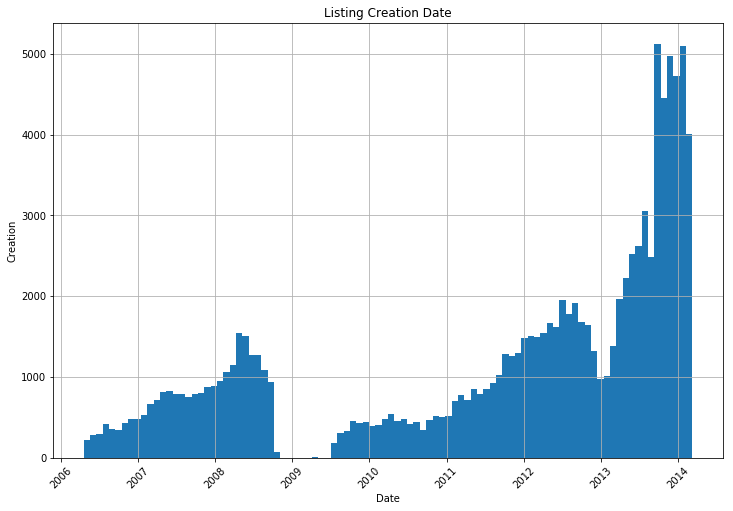

In [46]:
resize_plot([12,8])
df_clean.ListingCreationDate.hist(bins = 8*12)
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Creation')
plt.title('Listing Creation Date');

>The number of listings is increasing over the time and there is a gap in our plot and that because Prosper stoped on June 2008 then relaunched in July 2009. The causes are mentioned <a href ='https://en.wikipedia.org/wiki/Prosper_Marketplace#Loan_performance_prior_to_July_2009'>here</a>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>
- ProsperRating_Alpha follows a normal distrubtion. I have filled the missing values for ProsperRating_Alpha by the values from CreditGrade as I mentioned <a href='#prosper_rating_alpha'>here</a>.
- I found a gap while ploting ListingCreationDate, i google it out and i found the reason in this <a href='https://en.wikipedia.org/wiki/Prosper_Marketplace#Loan_performance_prior_to_July_2009'>web page</a>
- I found that most of the loans are not finished yet so, i keept only the finished loans

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>For my first question (Who is using prosper?) i'm using my cleaned dataset stored in df_clean and for the second question I'm using a reduced amount of data stored in df_cleanf which contains only the informatoins about finished loans.

## Bivariate Exploration

>I defined some functions to avoid repetition.

In [47]:
def mycountplot(data = df_clean, x = None, hue = None, order = None, size = [16,7], x_rotation = 90, y_rotation = 0, title = None, o = True):
    '''
        function for ploting countplot
    '''
    resize_plot(size)
    order = data[x].value_counts().index if o == True else None
    sb.countplot(data = data, x = x, hue = hue,order=order)
    plt.xticks(rotation=x_rotation)
    plt.yticks(rotation=y_rotation)
    plt.title(title);

In [48]:
def props2d(att, x = 'LoanStatus', nrows = 2, ncols = 4):
    ''' plot two-dimension proportions'''
    resize_plot([20, len(df_cleanf[att].cat.categories)+4])
    i=1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for c in df_cleanf[att].cat.categories:
        plt.subplot(nrows,ncols,i)
        n_points = df_cleanf[df_cleanf[att] == c].shape[0]

        # create the plot
        sb.countplot(data=df_cleanf[df_cleanf[att]== c], x = x, color = base_color)
        plt.yticks(np.arange(0, 1.05, 0.1) * n_points, ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])

        counts = df_cleanf[df_cleanf[att]== c][x].value_counts()
        props = counts/df_cleanf[df_cleanf[att]== c].shape[0]
        # print proportions
        for j in range(3):
            y = str('{:0.2f}'.format(props[j]*100)) + '%'
            plt.text(j-0.3, counts[j]+np.mean(counts)/10, y, va = 'center', color='black', fontdict={'fontsize': 12, 'fontweight': 'bold'});

        plt.ylabel('proportion')
        plt.title(c)
        plt.tight_layout()
        i += 1

#### Correlation

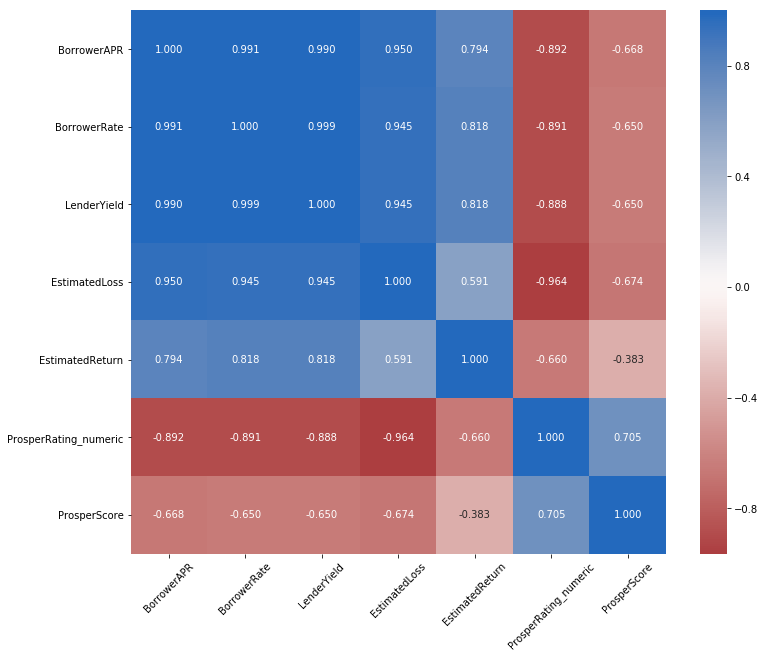

In [49]:
numeric = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating_numeric', 'ProsperScore']
resize_plot([12,10])
sb.heatmap(df_clean[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.show()

C:\Users\pc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


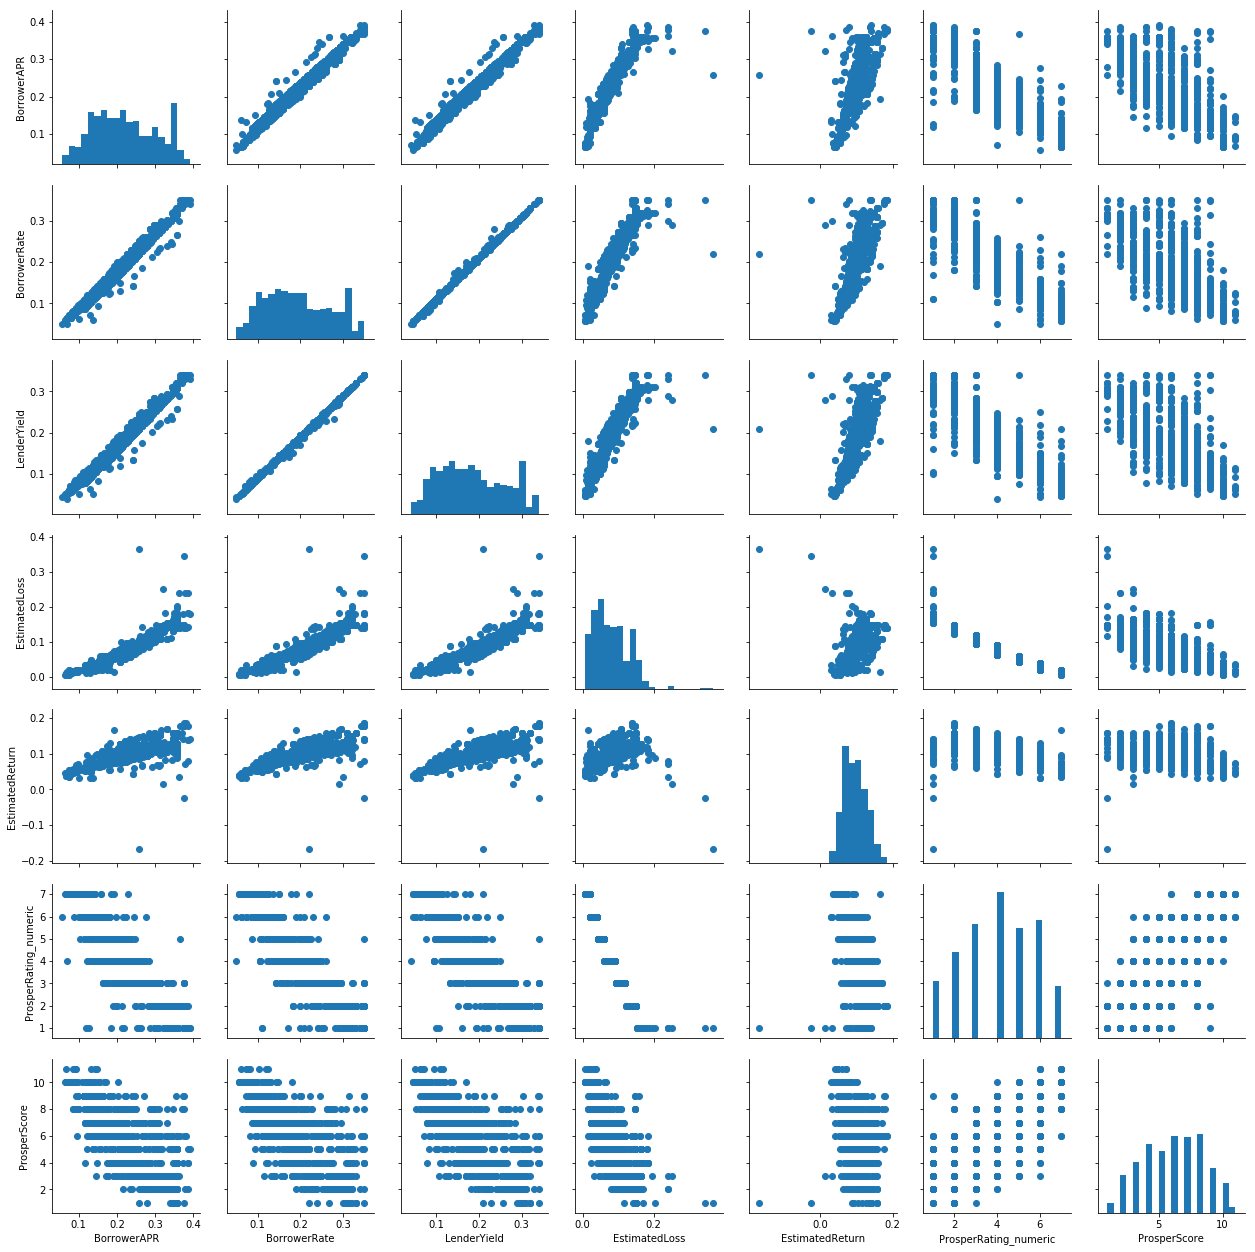

In [50]:
# plot matrix: sample 1000 Loans so that plots are clearer and
# they render faster
sample = np.random.choice(df_clean.index, 1000, replace = False)
loans_samp = df_clean.loc[sample,:]

g = sb.PairGrid(data = loans_samp, vars = numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

>We can see that there is a high positive correlation betweet ('BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedLoss', 'EstimatedReturn') and a high negative correlation between those variables and ProsperRating_numeric.

#### State and HomeOwner

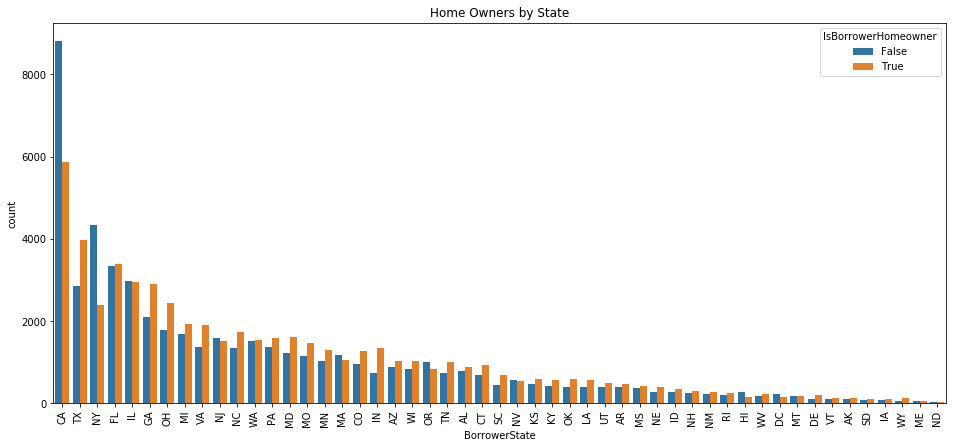

In [51]:
mycountplot(x = 'BorrowerState', hue = 'IsBorrowerHomeowner', title = 'Home Owners by State')

>Mybe it's not clear that for the majority of states the number of homeowners is more than the number of not homeowners so, lets calculate the proportions for homeowners for every state and plot the values again.

In [52]:
prop = df_clean.groupby(df_clean.BorrowerState).IsBorrowerHomeowner.sum()/df_clean.groupby(df_clean.BorrowerState).IsBorrowerHomeowner.count()
prop = pd.DataFrame(prop)
prop.rename(columns={"IsBorrowerHomeowner": "homeowner_prop"}, inplace = True)
prop['not_homeowner_prop'] = [1 - i for i in prop.homeowner_prop]
prop.head()

homeowner_prop  not_homeowner_prop
BorrowerState                                    
AK                   0.560000            0.440000
AL                   0.529201            0.470799
AR                   0.554386            0.445614
AZ                   0.540811            0.459189
CA                   0.399687            0.600313

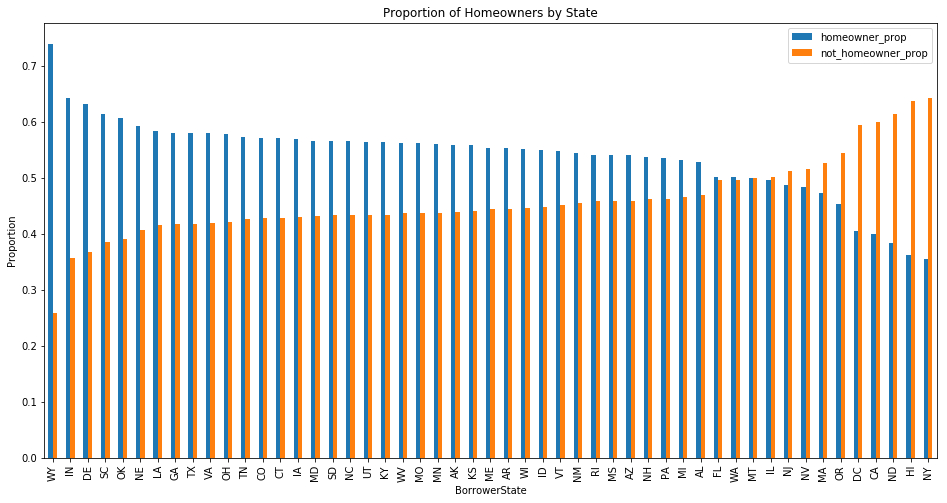

In [53]:
prop = prop.sort_values(by=['homeowner_prop'], ascending = False)
prop.plot(kind = 'bar', figsize=[16,8])
plt.xticks(rotation = 90)
plt.ylabel('Proportion')
plt.title('Proportion of Homeowners by State');

>Now it is clear that for the majority of states the proportion of home owners is greater than the proportion of not home owners.

#### Occupation and Homeowner

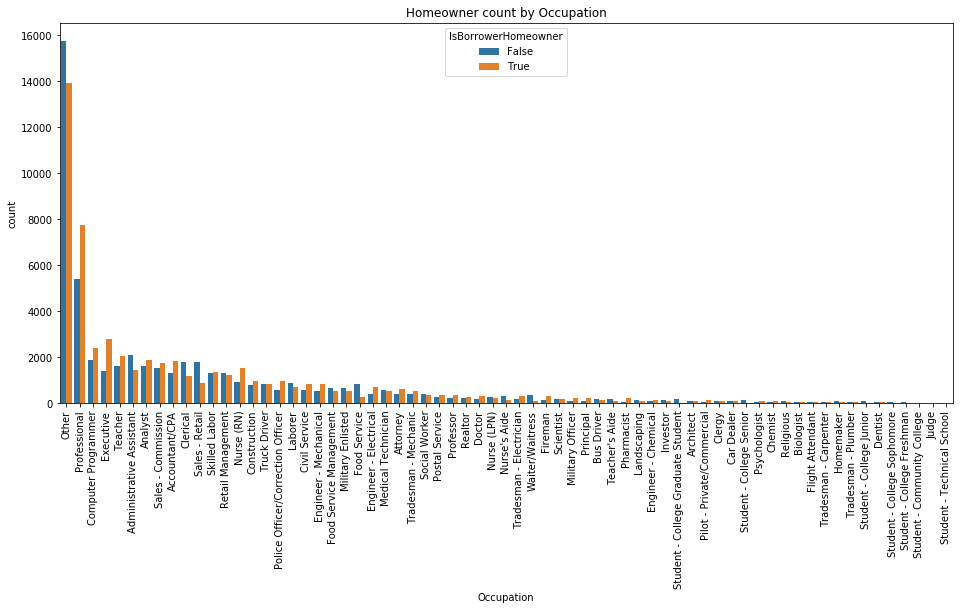

In [54]:
mycountplot(x='Occupation', hue='IsBorrowerHomeowner', title = 'Homeowner count by Occupation')

>Maybe proportions will give a better intuition

In [55]:
prop2 = df_clean.groupby(df_clean.Occupation).IsBorrowerHomeowner.sum()/df_clean.groupby(df_clean.Occupation).IsBorrowerHomeowner.count()
prop2 = pd.DataFrame(prop2)
prop2.rename(columns={"IsBorrowerHomeowner": "homeowner_prop"}, inplace = True)
prop2['not_homeowner_prop'] = [1 - i for i in prop2.homeowner_prop]

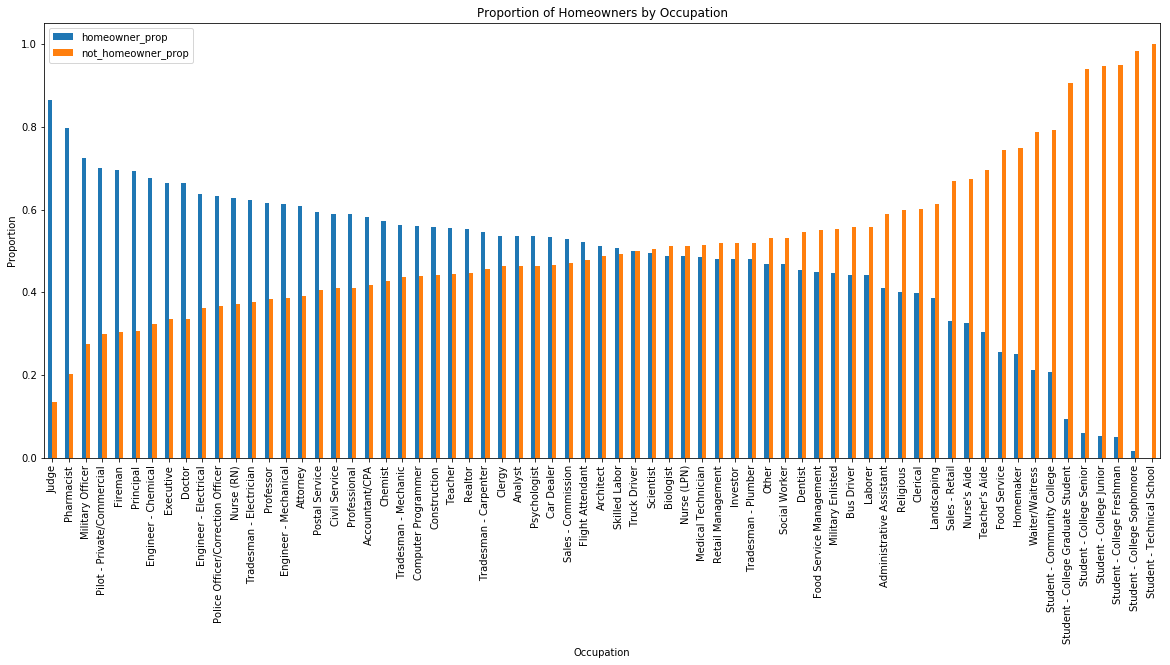

In [56]:
prop2 = prop2.sort_values(['homeowner_prop'], ascending = False)
prop2.plot(kind = 'bar', figsize=[20,8])
plt.ylabel('Proportion')
plt.xticks(rotation = 90)
plt.title('Proportion of Homeowners by Occupation');

>From the first look we can't say that the propotion of homeowners is greater than the proportion of not homeowner but if we look deeper we can see that the occupations with higher proportion of not homeowner are the different type of students and most of the time students live with their parents or in the university accommodation so, let's remove the students and see what we get.

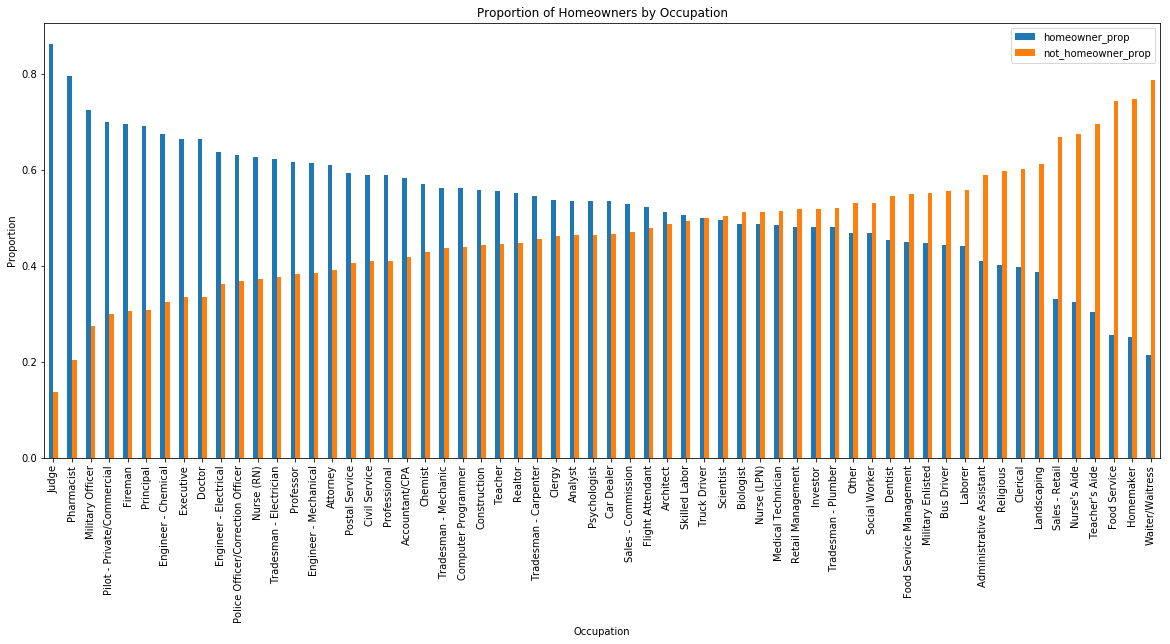

In [57]:
prop2 = prop2.sort_values(['homeowner_prop'], ascending = False)
prop2.iloc[:60].plot(kind = 'bar', figsize=[20,8])
plt.ylabel('Proportion')
plt.xticks(rotation = 90)
plt.title('Proportion of Homeowners by Occupation');

>This time the plot is more meaningful and we can say that for the majority of Occupations the proportion of homeowners is higher or approximately equal to the proportion of not-homeowners, except some occupations with low income like waiter, homemaker, food service and theacher's aide the proportion of not homeowner is higher

#### ProsperRating_Alpha and LoanStatus

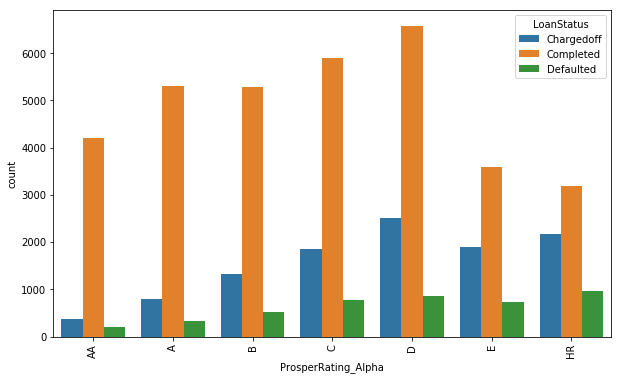

In [58]:
mycountplot(data = df_cleanf, x = 'ProsperRating_Alpha', hue = 'LoanStatus', size=[10,6], o = False)

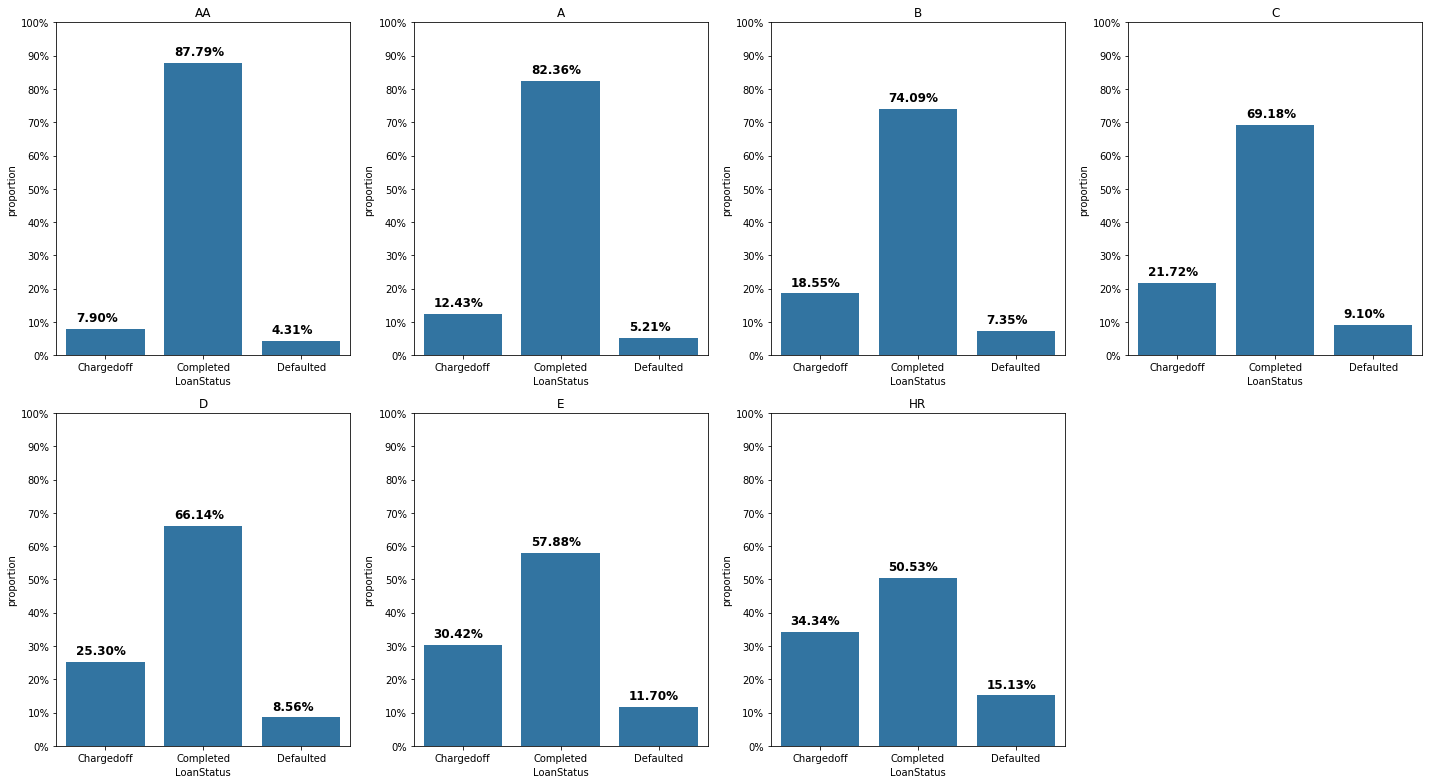

In [59]:
props2d('ProsperRating_Alpha')

>From proportions, we can see that while the risk increases (rate decreases) the proportion of Completed loans is decreasing and the proportion of Chargedoff and Defaulted loans is increasing.

#### IcomeRange and LoanStatus

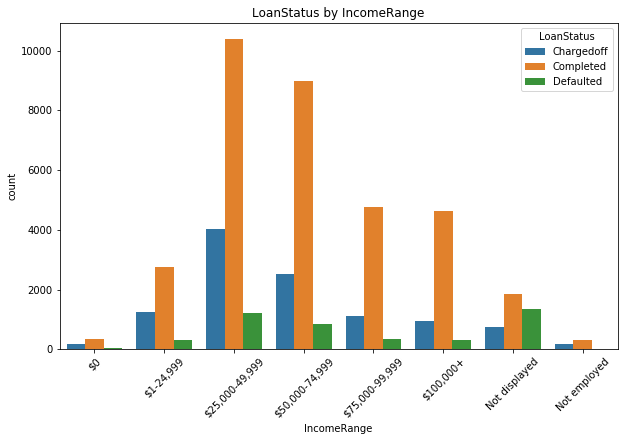

In [60]:
mycountplot(data=df_cleanf, x='IncomeRange', hue='LoanStatus', size=[10,6], o=False,
            x_rotation=45, title='LoanStatus by IncomeRange')

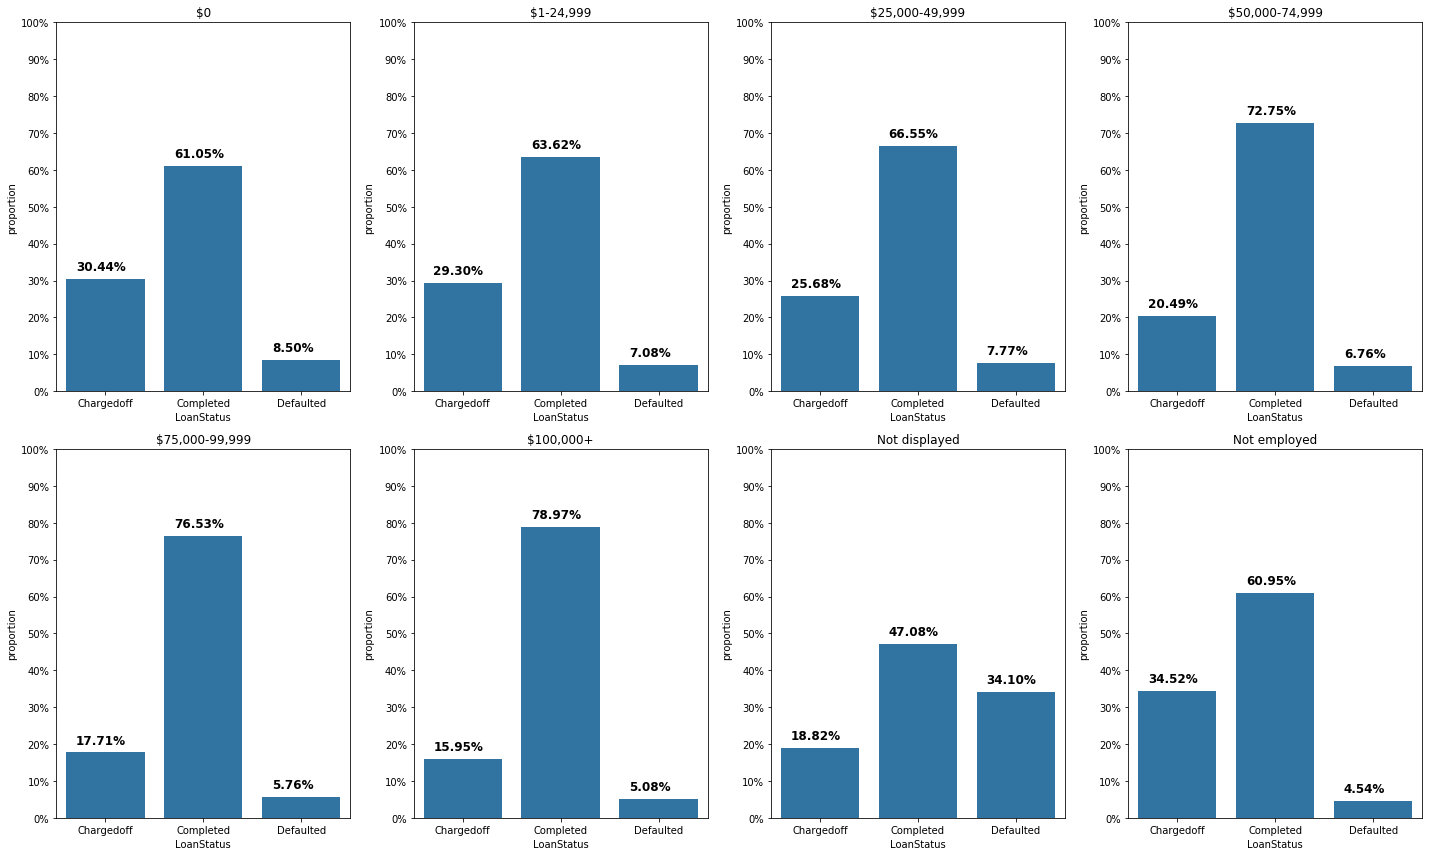

In [61]:
props2d("IncomeRange")

>From proportions we can see that for higher IncomeRange the proportion of Completed is high(78,97% for +100USD) and it decreases while the IncomeRange decreases.

#### Occupation and LoanStatus

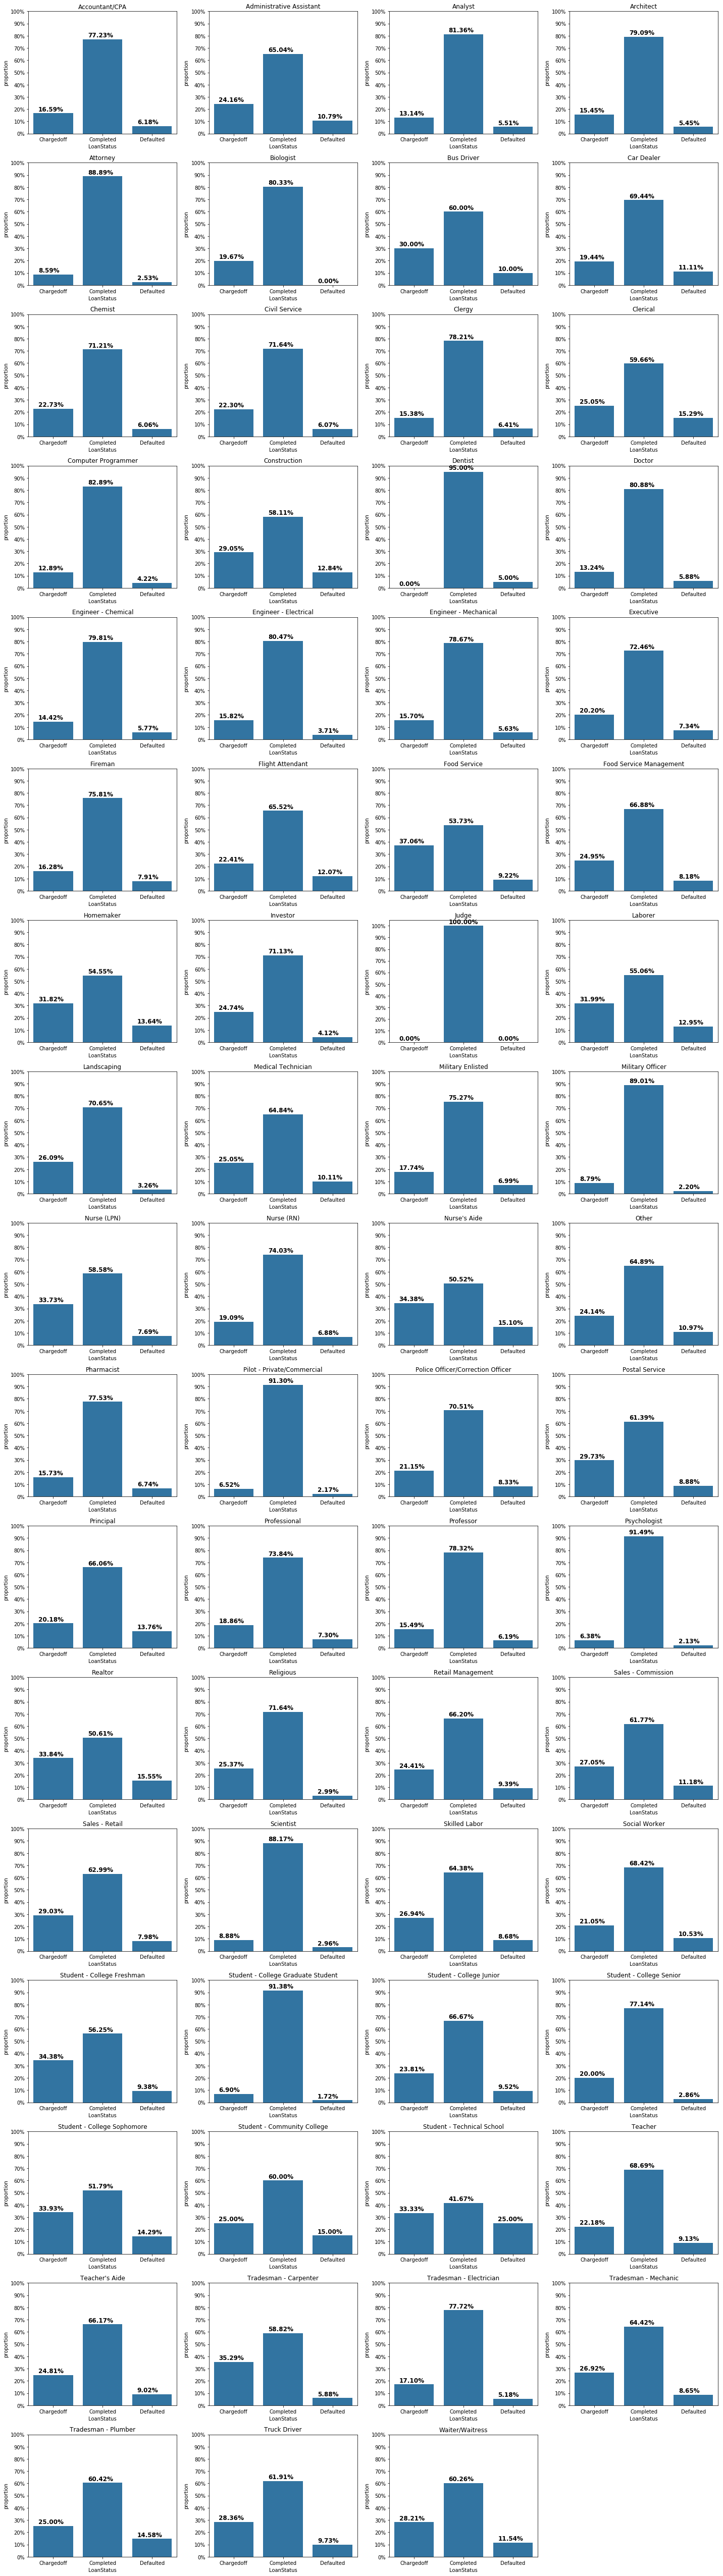

In [62]:
props2d('Occupation', nrows = 17, ncols = 4)

#### EmploymentStatus and LoanStatus

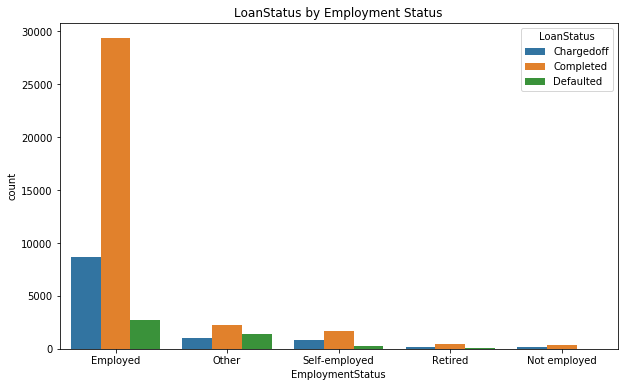

In [63]:
mycountplot(data = df_cleanf, x = 'EmploymentStatus', hue = 'LoanStatus', size=[10,6], x_rotation=0,
           title = 'LoanStatus by Employment Status', o=True)

>The number of Employed is very big compared to other employment status, we can't compaire the rate of completion by LonaStatus so, we should move to proportions.

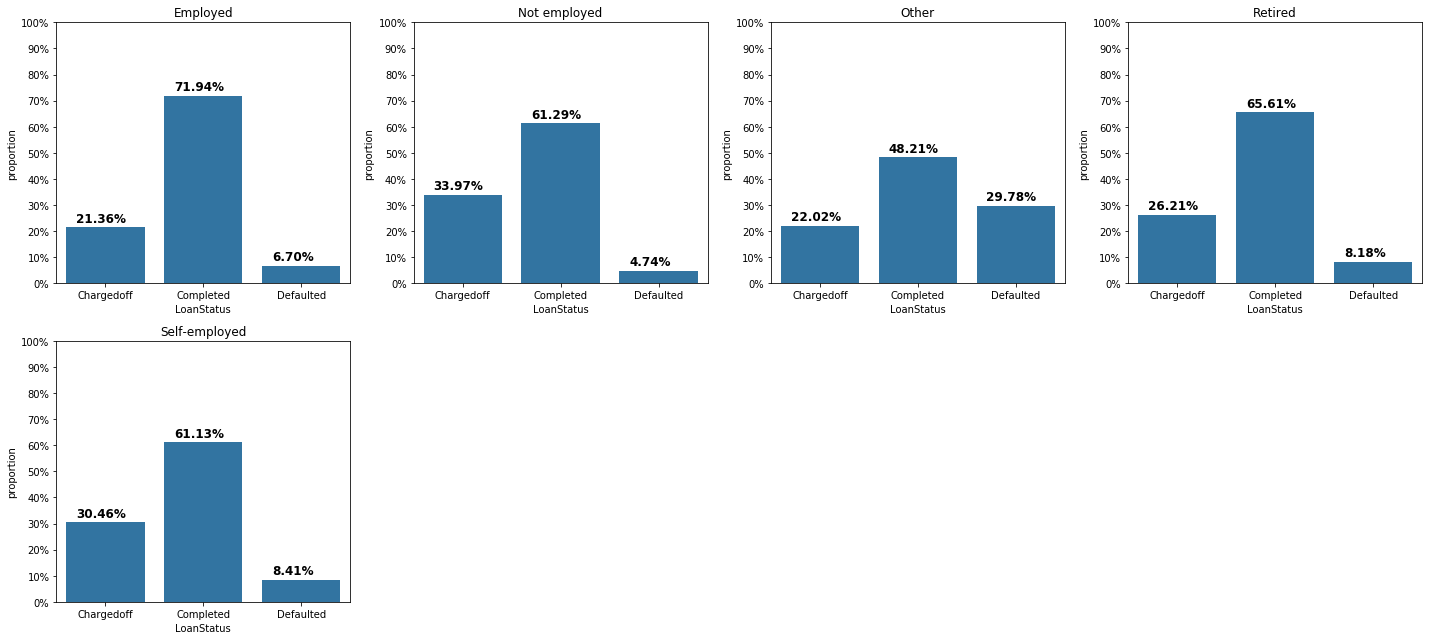

In [64]:
props2d('EmploymentStatus')

>From proportions we can see that the rate of completion for (Employed, self employed and retired) borrowers is greater than the rate of completion for not employed borrowers.

#### ProsperRating and IsBorrowerHomeowner

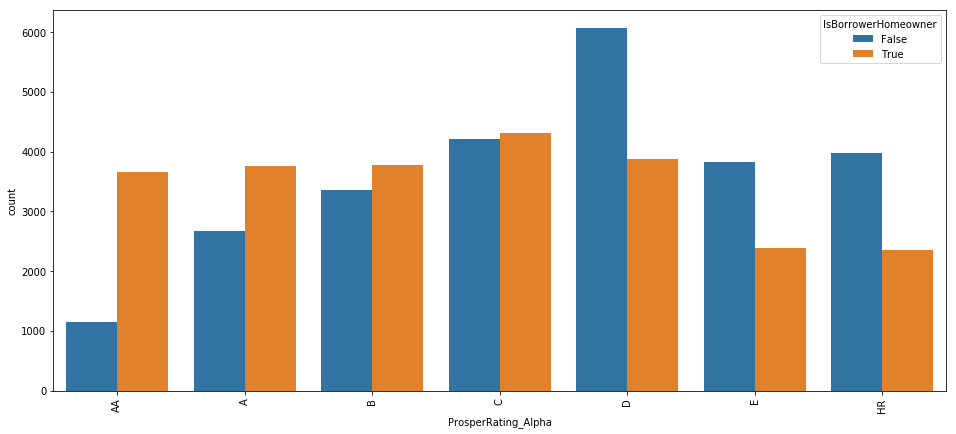

In [65]:
mycountplot(data = df_cleanf, x ='ProsperRating_Alpha', hue = 'IsBorrowerHomeowner', o=False)

>It is clear that for loans with lower risque(AA, A, and B) the number of homeowners is higher than the number of not-homeowners, for the middle rate (C) the numbers are approximately equal and for rates with higher risque (D, E, and HR) the number of not-homeowners is higher. 

#### EmploymentStatus and ProsperRating

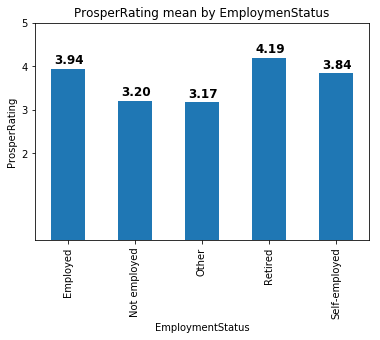

In [66]:
mean = df_cleanf.groupby('EmploymentStatus').ProsperRating_numeric.mean()
mean.plot(kind='bar')
plt.yticks(range(2,6), range(2,6));
plt.title('ProsperRating mean by EmploymenStatus')
plt.ylabel('ProsperRating');
for j in range(5):
    y = str('{:0.2f}'.format(mean[j]))
    plt.text(j-0.2, mean[j]+0.2, y, va = 'center', color='black', fontdict={'fontsize': 12, 'fontweight': 'bold'});

>The highest rating (lowest risque) goes for retired borrowers followed by Employed and self-employed and the least rating (higher risque) goes for Other and Not employed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- The relation between Prosper Rating (RatingGrade) and Loan status is that every time the rate (risque) increases the probability of completion decreases and the probability that the loan will be defaulted or charged-off increases.
- The relation between Income Range and Loan Status is that as the IncomeRange is getting higher, the probability of completion will be higher and the probability of being charged-off or defaulted will be lower.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>- For the majority of states and Occupations, the proportion of homeowners is greater than the proportion of not homeowners.

## Multivariate Exploration

>Define some fuctions to avoid repetition.

In [67]:
def heatm(ind, col, val):
    ''' a fuction to plot heatmap '''
    cat_means = df_cleanf.groupby([col, ind]).mean()[val]
    cat_means = cat_means.reset_index(name = 'num_var2_avg')
    cat_means = cat_means.pivot(index = ind, columns = col, values = 'num_var2_avg')
    label = 'mean('+val+')'
    sb.heatmap(cat_means, annot = True, fmt = '.3f',
               cbar_kws = {'label' : label});

#### LoanStatus, ProsperRating and IsBorrowerHomeowner

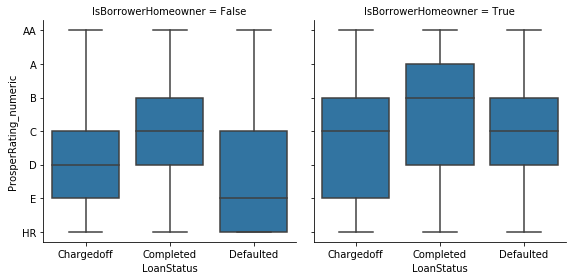

In [68]:
g = sb.FacetGrid(data = df_cleanf, col = 'IsBorrowerHomeowner', height = 4)
g.map(sb.boxplot, 'LoanStatus', 'ProsperRating_numeric', order = None)
plt.yticks([7, 6, 5, 4, 3, 2, 1],['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

C:\Users\pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


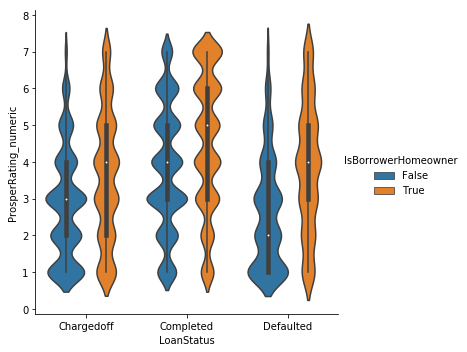

In [69]:
sb.catplot(x="LoanStatus", y="ProsperRating_numeric", hue="IsBorrowerHomeowner",split = False,
           kind="violin", data=df_cleanf);

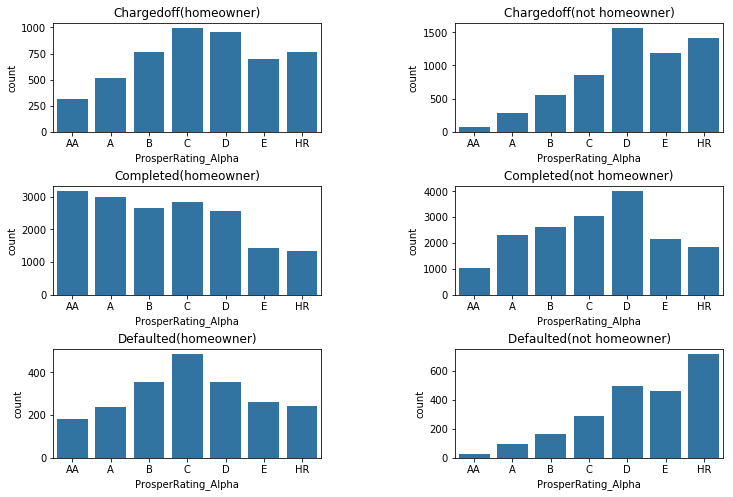

In [70]:
i = 1
resize_plot([12,8])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for c in df_cleanf.LoanStatus.cat.categories:
    plt.subplot(3,2,i)
    sb.countplot(data = df_cleanf.query('IsBorrowerHomeowner == True and LoanStatus == @c'), x = 'ProsperRating_Alpha', color = base_color)
    plt.title(c+'(homeowner)')
    i = i+1
    plt.subplot(3,2,i)
    sb.countplot(data = df_cleanf.query('IsBorrowerHomeowner == False and LoanStatus == @c'), x = 'ProsperRating_Alpha', color = base_color)
    plt.title(c+'(not homeowner)')
    i = i+1

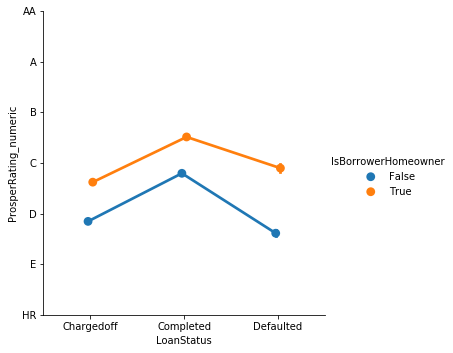

In [71]:
sb.catplot(x="LoanStatus", y="ProsperRating_numeric", hue="IsBorrowerHomeowner", kind="point",dodge = True, data=df_cleanf);
# yes = round(df_cleanf.query('IsBorrowerHomeowner == True').ProsperRating_numeric.mean(), 2)
# no = round(df_cleanf.query('IsBorrowerHomeowner == False').ProsperRating_numeric.mean(), 2)
# plt.axhline(y=yes, color = 'orange', linestyle = 'dashed')
# plt.axhline(y = no, color = 'blue', linestyle = 'dashed')
plt.yticks([7, 6, 5, 4, 3, 2, 1],['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

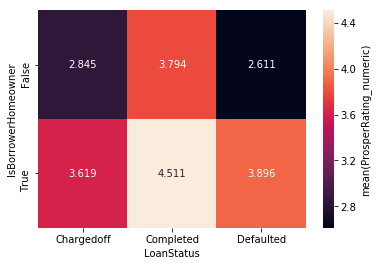

In [72]:
heatm('IsBorrowerHomeowner', 'LoanStatus', 'ProsperRating_numeric')

> This heatmap shows the values of each point in the line plot.

>Let's look at loan status one by one and compare the rating for homeowners and not-homeowners
- First, **Chargedoff** loans: for not-homeowners, the data is left-skewed (more data on the right side) which
 means more data with high risque the same thing for homeowners but not as much as not-homeowners
 as we can see at the boxplot (for not-homeowners the median is D and the majority of the data
 is grouped on the right side of it [E and HR], but for homeowners, the median is C and data 
 grouped in a wider range on the right side of it [D, E, and HR]. Actually the violin plot
 shows the same facts (for not-homeowners wide curves around C and HR).
- Second, **Completed** loans: for homeowners, we can see from the boxplot and the violin 
plot (wider curves on the top) that the distribution of the data is right-skewed
 which means more data with low risque, but it is not the case for not-homeowners,
 as we can see on the count plot the highest count of the rating is D so we can say that the data
 is left-skewed with higher risque compared to homeowners and that is clearly visible on the line plot.
- Third, **Defaulted** loans: from the violin plot and the count plot, we can see that the  data 
for homeowners is normally distributed and centered around C, but for not-homeowners the data
is extremely left-skewed with the lowest rating (the highest risque), and if we look at the line plot
we can see the large distance between the two points of defaulted loans for homeowners and
 not-homeowners it is the largest distance compared to other loan status.


#### LoanStatus, ProsperRating and IncomeRange

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


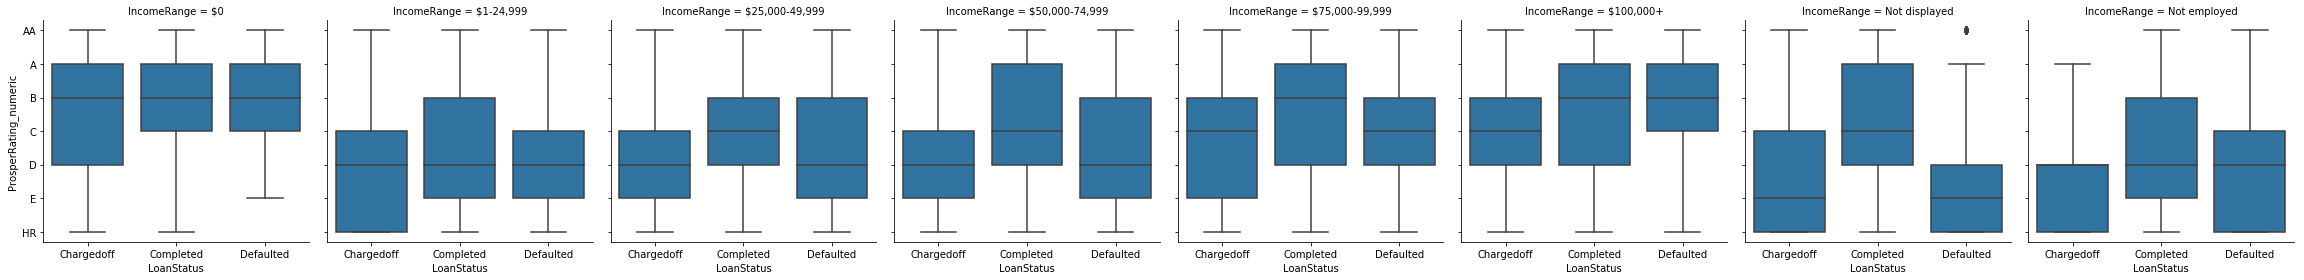

In [73]:
g = sb.FacetGrid(data = df_cleanf, col = 'IncomeRange', height = 4)
g.map(sb.boxplot, 'LoanStatus', 'ProsperRating_numeric')
plt.yticks([7, 6, 5, 4, 3, 2, 1],['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

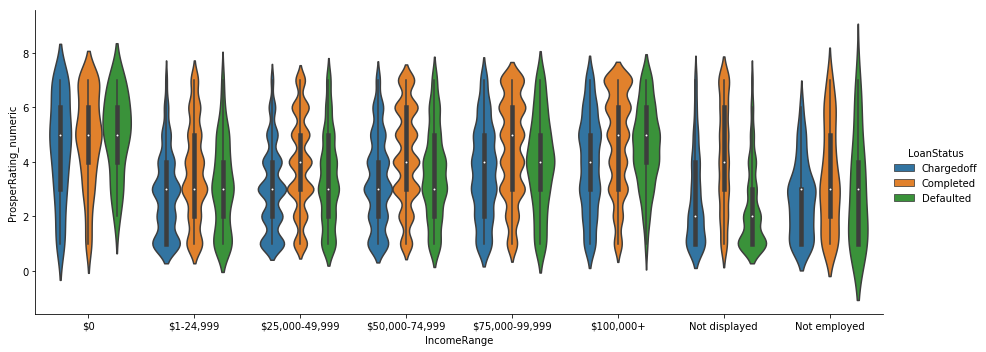

In [74]:
sb.catplot(x="IncomeRange", y="ProsperRating_numeric", hue="LoanStatus",
           kind="violin", data=df_cleanf, aspect=20/8);

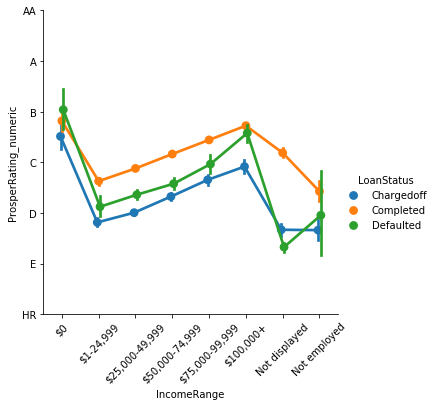

In [75]:
sb.catplot(x="IncomeRange", y="ProsperRating_numeric", hue="LoanStatus", kind="point",dodge = True, data=df_cleanf);
plt.yticks([7, 6, 5, 4, 3, 2, 1],['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.xticks(rotation = 45);

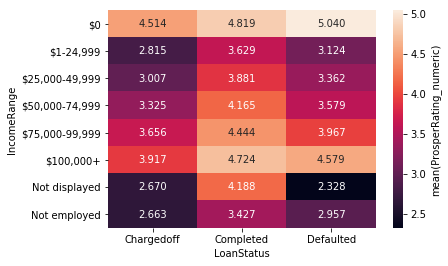

In [76]:
heatm('IncomeRange', 'LoanStatus', 'ProsperRating_numeric')

>The first thing that caught my attention the first time I've seen these plots is the loans associated with income range equal to 0. Look at the box plot or the violin plot it tells us that the median is B and the distribution of the data is right-skewed (more data on the left side = more data with high rating = more data with low risque), so the loans associated with income range equal to 0 have the lowest risque for all loan status !<br>
Let's continue with count plot, all the loan status are following the same pattern (increasing in parallel) for all the income ranges regardless to 'Not displayed' and 'Not employed', it goes from the lowest rate (higher risque) on the income range '1-24,999' and goes up till it reaches the maximum (lower risque) on the income range '100,000+', then it goes down again for 'Not displayed' and 'Not employed'.

>Since the three loan status are walking in parallel I just want to add the following plot to solidify the idea and show clearly the pattern that the data are following.

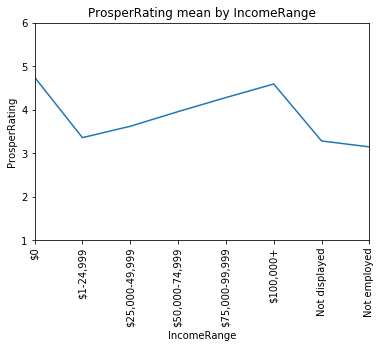

In [77]:
m = df_cleanf.groupby('IncomeRange').ProsperRating_numeric.mean()
m.plot()
plt.yticks(range(1,7),range(1,7))
plt.xticks(rotation=90)
plt.ylabel('ProsperRating')
plt.title('ProsperRating mean by IncomeRange');

#### LoanStatus, ProsperRating and EmploymentStatus

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

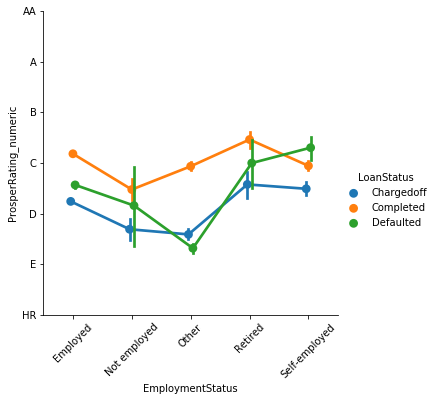

In [78]:
sb.catplot(x="EmploymentStatus", y="ProsperRating_numeric", hue="LoanStatus", kind="point",dodge = True, data=df_cleanf);
plt.yticks([7, 6, 5, 4, 3, 2, 1],['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.xticks(rotation = 45)

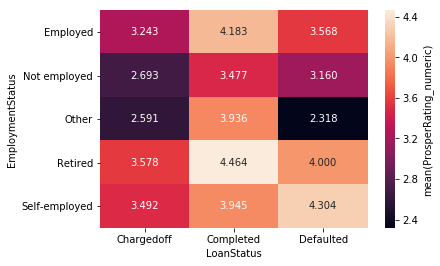

In [79]:
heatm('EmploymentStatus', 'LoanStatus', 'ProsperRating_numeric')

>Employed and retired borrowers have lower rating (mean) for all the loan Status and that corresponds with our findings from the previous section of bivariate exploration, and now we know why the 'Other' category has the lowest rate (higher risque) in average, it is because it has a very low rate for Chargedoff and Defaulted loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>
- Relation between ProsperRating and IncomeRange is that every time the IncomeRange get higher the ProsperRating mean get higher (the risque get lower) and that is true for every loan status.
- The mean of ProsperRating for complited loans is higher than the mean of ProsperRating for chargedoff and defaulted loans, and that is true for both homeowners and not homeowners.

In [80]:
#save the data to use it in explanatory analysis 
df_clean.to_csv('ProsperDataClean.csv')
df_cleanf.to_csv('ProsperFinishedLoans.csv')